#  Processing and Loading Yelp's Data

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from catboost import CatBoostClassifier

%matplotlib inline
pd.options.display.mpl_style = 'default'

import os
from IPython.core.display import HTML

import json
import numpy
from pandas.io.json import json_normalize
from time import time
%matplotlib inline

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp


/Users/chenbo/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


<h3> YELP DATASET CHALLENGE URL</h3>
<br />
This link gives you an idea of the structure of Data Schema: all JSON files with each line as a distinct record
<br />
http://www.yelp.com/dataset_challenge
<br />
There are 5 tables:
<ol>
<li>Business (42,153 records)</li>
<li>Review (1,125,458 records)</li>
<li>Check ins (31,617 records)</li>
<li>Tips (403,210 records)</li>
<li>Users (252,898 records)</li>
</ol>
<br />
Further down this notebook, we will see that the Reviews table is a 1GB file that's not easy to load directly into IPython RAM, so we'll chop it up into 4 pieces along the way of our cleaning process.

In [2]:
YELP_DATACHALLENGE_URL = 'http://www.yelp.com/dataset_challenge'
tag = '<iframe src="{0}" width="1100px" height="333px">'.format(YELP_DATACHALLENGE_URL)
HTML(tag)

<h3> Slight Data Wrangling </h3>
<br />
We need to clean the given files to be interpretable by Panda's JSON function, so we have to
<ol>
<li> Add a comma after every line of each file</li>
<li> Remove the last comma of each file</li>
<li> Prepend '[' as the first character of each file</li>
<li> Append ']' as the last character of each file</li>
</ol>
<br />
Just make sure you have enough disk space and choose both your raw and clean data folders to store them in.

<h3>Loading a file from your clean data directory</h3>

In [27]:
def format_to_df(filename):
    output_json = []
    for line in open(filename):
        output_json.append(json.loads(line))
    output_df = json_normalize(output_json)
    return output_df

file_string_1 = "/Users/chenbo/Desktop/UCL/Dissertation/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_"
file_string_2 = ".json"

file_types = ['business']

df_dict = {}

for file_type in file_types:
    checkpoint = time()
    df_dict[file_type] = format_to_df(file_string_1 + file_type + file_string_2)
    print("File processed: {0:<10}  |  Time taken: {1:.2f}s".format(file_type, time() - checkpoint))
    checkpoint = time()

File processed: business    |  Time taken: 37.07s


save the processed data to csv format

In [ ]:
for file_type in file_types:
    checkpoint = time()
    df_dict[file_type].to_csv("yelp_academic_dataset_" + file_type + '.csv')
    print("File processed: {0:<10}  |  Time taken: {1:.2f}s".format(file_type, time() - checkpoint))
    checkpoint = time()

In [10]:
biz = pd.read_csv("yelp_academic_dataset_business.csv")


/Users/chenbo/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (15,16,20,22,23,24,25,26,27,28,57,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [50]:
biz_ = biz[['stars','review_count','open']]

In [476]:
pd.crosstab(biz.stars,[biz.open])

open,False,True
stars,,
1.0,90,982
1.5,228,1662
2.0,499,3278
2.5,1242,6205
3.0,2099,8924
3.5,3029,13595
4.0,2737,14719
4.5,1730,11918
5.0,1036,11928


In [14]:
'''
trace1 = go.Bar(
    x=stars,
    y=y1,
    name='Closed',
    marker=dict(
        color='rgb(55, 83, 109)'
    )
)
trace2 = go.Bar(
    x=stars,
    y=y2,
    name='Open',
    marker=dict(
        color='rgb(26, 118, 255)'
    )
)
data = [trace1, trace2]
layout = go.Layout(
    title='Stars Histogram of Open/Closed Business',
    xaxis=dict(
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    yaxis=dict(
        title='# of business',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        ),
        tickfont=dict(
            size=14,
            color='rgb(107, 107, 107)'
        )
    ),
    legend=dict(
        x=0,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)'
    ),
    barmode='group',
    bargap=0.15,
    bargroupgap=0.1
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='style-bar')
'''


"\ntrace1 = go.Bar(\n    x=stars,\n    y=y1,\n    name='Closed',\n    marker=dict(\n        color='rgb(55, 83, 109)'\n    )\n)\ntrace2 = go.Bar(\n    x=stars,\n    y=y2,\n    name='Open',\n    marker=dict(\n        color='rgb(26, 118, 255)'\n    )\n)\ndata = [trace1, trace2]\nlayout = go.Layout(\n    title='Stars Histogram of Open/Closed Business',\n    xaxis=dict(\n        tickfont=dict(\n            size=14,\n            color='rgb(107, 107, 107)'\n        )\n    ),\n    yaxis=dict(\n        title='# of business',\n        titlefont=dict(\n            size=16,\n            color='rgb(107, 107, 107)'\n        ),\n        tickfont=dict(\n            size=14,\n            color='rgb(107, 107, 107)'\n        )\n    ),\n    legend=dict(\n        x=0,\n        y=1.0,\n        bgcolor='rgba(255, 255, 255, 0)',\n        bordercolor='rgba(255, 255, 255, 0)'\n    ),\n    barmode='group',\n    bargap=0.15,\n    bargroupgap=0.1\n)\n\nfig = go.Figure(data=data, layout=layout)\npy.iplot(fig, filen

# Logistic Regression Analysis

In [423]:
biz_.describe()

,stars,review_count
count,85901.000000,85901.000000
mean,3.694852,34.352359
std,0.946045,108.677591
min,1.000000,3.000000
25%,3.000000,5.000000
50%,4.000000,10.000000
75%,4.500000,26.000000
max,5.000000,6200.000000


In [52]:
dummy_= pd.get_dummies(biz_['stars'], prefix='stars')

In [53]:
dummy_.head()

,stars_1.0,stars_1.5,stars_2.0,stars_2.5,stars_3.0,stars_3.5,stars_4.0,stars_4.5,stars_5.0
0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1


In [54]:
data = biz_[['review_count','open']].join(dummy_.ix[:, 'stars_1.5':])

In [55]:
data.review_count=data.review_count.apply(np.log)

In [56]:
data['intercept'] = 1.0

In [57]:
keep_col = list(data.columns)

In [58]:
keep_col.remove('open')

In [60]:
import statsmodels.discrete.discrete_model as sm
logit = sm.Logit(data.open, data[keep_col])

In [61]:
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.411024
         Iterations 6


In [63]:
result.summary(yname='open status',)

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            open status   No. Observations:                85901
Model:                          Logit   Df Residuals:                    85891
Method:                           MLE   Df Model:                            9
Date:                Sun, 03 Sep 2017   Pseudo R-squ.:                 0.01845
Time:                        17:45:12   Log-Likelihood:                -35307.
converged:                       True   LL-Null:                       -35971.
                                        LLR p-value:                4.625e-280
================================================================================
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
review_count     0.1558      0.009     17.959      0.000         0.139     0.173
stars_1.5       -0.4773      0.131     -3.645      0.000        -0.734    -0.221
stars_2.0       -0.6023      0.120     -5.006      0.000        -0.838    -0.366
stars_2.5       -0.8906      0.115     -7.770      0.000        -1.115    -0.666
stars_3.0       -1.1044      0.113     -9.761      0.000        -1.326    -0.883
stars_3.5       -1.0625      0.112     -9.456      0.000        -1.283    -0.842
stars_4.0       -0.9084      0.113     -8.066      0.000        -1.129    -0.688
stars_4.5       -0.6218      0.113     -5.480      0.000        -0.844    -0.399
stars_5.0       -0.0060      0.115     -0.053      0.958        -0.231     0.219
intercept        2.1517      0.111     19.395      0.000         1.934     2.369
================================================================================
"""

In [471]:
# odds ratios only
np.exp(result.params)

review_count    1.187289
stars_1.5       0.644452
stars_2.0       0.498443
stars_2.5       0.362042
stars_3.0       0.306777
stars_3.5       0.322551
stars_4.0       0.372420
stars_4.5       0.495534
stars_5.0       0.942849
intercept       1.543588
dtype: float64

In [251]:
def cartesian(arrays, out=None):

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in range(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [412]:
log_reviewcounts = np.linspace(data['review_count'].min(), data['review_count'].max(), 10)

In [413]:
combos = pd.DataFrame(cartesian([log_reviewcounts, [1.0,1.5,2.0,2.5,3.0,3.5, 4.0,4.5,5.0], [1.]]))

/Users/chenbo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future

/Users/chenbo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:15: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



In [414]:
combos.columns = ['log_reviewcounts', 'stars', 'intercept']
dummy_ranks = pd.get_dummies(combos['stars'], prefix='stars')
combos = combos.join(dummy_ranks.ix[:, 'stars_1.0':])
x=list(combos.columns)
x.remove('stars')
combos['open'] = result.predict(combos[x])
grouped = pd.pivot_table(combos, values=['open'], index=['log_reviewcounts','stars'],
                            aggfunc=np.mean)

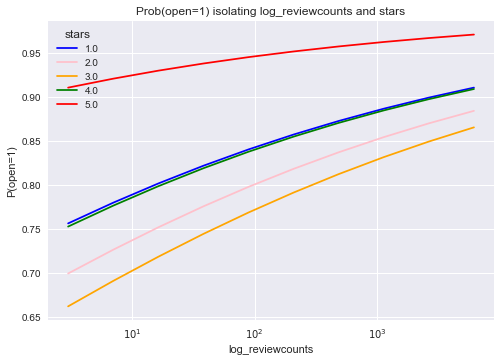

In [421]:
isolate_and_plot('log_reviewcounts')

In [15]:
'''
import plotly.plotly as py
import plotly.graph_objs as go
py.sign_in(username='chenbotang', api_key='sb4wRSQGTAuEGa7z8nlo')

import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x=x.index,
            y=x.values,
            marker=dict(
            color=['rgba(55, 128, 191, 0.7)',
              'rgba(55, 128, 191, 0.7)',
              'rgba(55, 128, 191, 0.7)',
              'rgba(55, 128, 191, 0.7)',
              'rgba(55, 128, 191, 0.7)',
              'rgba(55, 128, 191, 0.7)',
               'rgba(55, 128, 191, 0.7)',
                'rgba(219, 64, 82, 0.7)',
               'rgba(55, 128, 191, 0.7)',
                
               'rgba(55, 128, 191, 0.7)',
                'rgba(55, 128, 191, 0.7)',
                'rgba(55, 128, 191, 0.7)',
                'rgba(55, 128, 191, 0.7)',
                'rgba(55, 128, 191, 0.7)',
                'rgba(55, 128, 191, 0.7)',
                'rgba(55, 128, 191, 0.7)',
                'rgba(219, 64, 82, 0.7)',
                'rgba(55, 128, 191, 0.7)',
                'rgba(55, 128, 191, 0.7)',
                'rgba(55, 128, 191, 0.7)'
               
               
              ])
           
    )]

layout = go.Layout(
    title='Top 20 city with most businesses',
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic-bar')
'''


"\nimport plotly.plotly as py\nimport plotly.graph_objs as go\npy.sign_in(username='chenbotang', api_key='sb4wRSQGTAuEGa7z8nlo')\n\nimport plotly.plotly as py\nimport plotly.graph_objs as go\n\ndata = [go.Bar(\n            x=x.index,\n            y=x.values,\n            marker=dict(\n            color=['rgba(55, 128, 191, 0.7)',\n              'rgba(55, 128, 191, 0.7)',\n              'rgba(55, 128, 191, 0.7)',\n              'rgba(55, 128, 191, 0.7)',\n              'rgba(55, 128, 191, 0.7)',\n              'rgba(55, 128, 191, 0.7)',\n               'rgba(55, 128, 191, 0.7)',\n                'rgba(219, 64, 82, 0.7)',\n               'rgba(55, 128, 191, 0.7)',\n                \n               'rgba(55, 128, 191, 0.7)',\n                'rgba(55, 128, 191, 0.7)',\n                'rgba(55, 128, 191, 0.7)',\n                'rgba(55, 128, 191, 0.7)',\n                'rgba(55, 128, 191, 0.7)',\n                'rgba(55, 128, 191, 0.7)',\n                'rgba(55, 128, 191, 0.7)',\n   

# Select City

In [5]:
def city_select(city,data):
    new_data =data[data.city==city]
    return new_data

In [6]:
Ednbrugh = city_select('Edinburgh',biz)

# Select Business Type

In [4]:
def business_type(business_type,data):
    a=[]
    for t in data['categories']:
        a.append(str(t).find(business_type))
    data['filter'] = pd.Series(a, index=data.index)
    output = data.drop(data[data['filter']<0].index)
    
    del output['filter']
    return output
    

In [5]:
ka_re = business_type('Restaurants',ka)

/Users/chenbo/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [202]:
# save the data as csv
ed.to_csv('ed_total.csv')

In [18]:
ED = pd.read_csv('ed_total.csv')


In [3]:
ED.open.value_counts()

True     2790
False     570
Name: open, dtype: int64

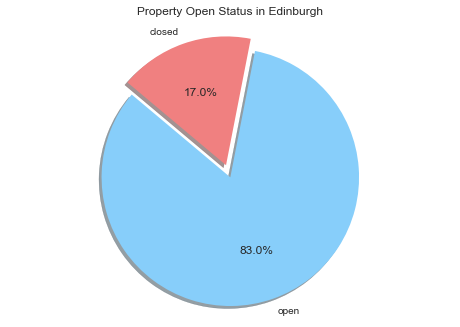

In [165]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = 'open','closed'
sizes = [2790, 570
        ]
colors = ['lightskyblue','lightcoral']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.title('Property Open Status in Edinburgh') 
plt.axis('equal')
plt.show()

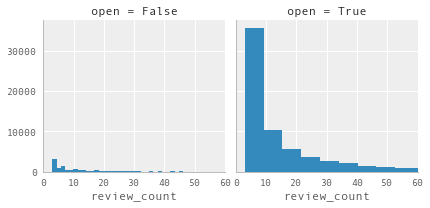

In [249]:
g = sns.FacetGrid(biz, col='open')
g.map(plt.hist, 'review_count', bins=1000)
g.set(xlim=(0,60))

#    Construct Network and extract properties

In [91]:
#loading data
biz = pd.read_csv("yelp_academic_dataset_business.csv")
review = pd.read_csv("yelp_academic_dataset_review.csv")
user= pd.read_csv("yelp_academic_dataset_user.csv")

/Users/chenbo/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (15,16,20,22,23,24,25,26,27,28,57,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/chenbo/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [92]:
# combine user and business table and filter out businesses in Edinburgh
review_biz = review.merge(biz,on='business_id',how='left')
review_biz_user= review_biz.merge(user,on='user_id',how='left')
review_biz_ED = review_biz_user[review_biz_user.city =='Edinburgh']

In [96]:
review_biz_ED = pd.read_csv('ed_reviws.csv')

/Users/chenbo/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14,15,28,34,35,36,37,38,39,40,54,55,56,57,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [97]:
#filter sub networks, we have a positive, a negative , an elite and total network. 
#change the filtering conditions to get different data
review_biz_ED =review_biz_ED[review_biz_ED.stars_x >=4]
review_biz_ED = review_biz_ED.reset_index()

# Calculate networks properties

In [9]:
def strip(data):
    

    dic = {}
    for i in range (0,len(data)):
        if type(dic.get(data.user_id[i])) is list:
                    dic[data.user_id[i]].append(data.business_id[i])
        else:
                    dic[data.user_id[i]]=[]
                    dic[data.user_id[i]].append(data.business_id[i])
    return dic




In [99]:
dic = strip(review_biz_ED)

In [85]:
def pairs(L):
    L = list(set(L))
    result =[]
    for i,a in enumerate(L):
        if i+1 < len(L):
            for b in L[i+1:]:
                result.append(a+','+b)
    return result

In [100]:
import collections as c
pair = c.defaultdict(int)

for value_list in dic.values():
    for i in pairs(value_list):
        pair[i] += 1

In [101]:
network = pd.DataFrame()
network['links'] = pair.keys()
network['weight'] = pair.values()

In [103]:
network['A'],network['B'] = network.links.str.split(',',1).str

In [104]:
network.head()

,links,weight,A,B
0,"kRMmce-qdD06nm4ESno_3g,syQJzSlYZJPEBQwHO36JzQ",1,kRMmce-qdD06nm4ESno_3g,syQJzSlYZJPEBQwHO36JzQ
1,"kRMmce-qdD06nm4ESno_3g,gPOBhJ_Brqt-OOdYhoXhlw",1,kRMmce-qdD06nm4ESno_3g,gPOBhJ_Brqt-OOdYhoXhlw
2,"kRMmce-qdD06nm4ESno_3g,apjUK1BbswSKo5jZMuwq7A",1,kRMmce-qdD06nm4ESno_3g,apjUK1BbswSKo5jZMuwq7A
3,"kRMmce-qdD06nm4ESno_3g,Gyu9Xu7-I5NVNDTgTUnuMA",1,kRMmce-qdD06nm4ESno_3g,Gyu9Xu7-I5NVNDTgTUnuMA
4,"kRMmce-qdD06nm4ESno_3g,SuFx7otHdR-8nLw2sxkY0w",1,kRMmce-qdD06nm4ESno_3g,SuFx7otHdR-8nLw2sxkY0w


In [105]:
network = network[['A','B','weight']]

In [57]:
network.head()

,A,B,weight
0,gyhCX6sBgZnckaBWFq8Gyw,Nq_BMV7kyx9_C3w0Jip6CA,1
1,gyhCX6sBgZnckaBWFq8Gyw,JpA3Rl0-h9digvhs52BDwA,1
2,gyhCX6sBgZnckaBWFq8Gyw,aFVO6hoFlOCN8pKsmJbWjw,1
3,gyhCX6sBgZnckaBWFq8Gyw,qZGqQUvorJbNKfv6AaWhWg,1
4,gyhCX6sBgZnckaBWFq8Gyw,BnlVRB0L2N62VIp4BFmGaw,2


In [106]:
network.to_csv('network_ED_45stars_weighted.csv')

# Load the data into networkx to extract networks properties

In [107]:
#loading data
pos = pd.read_csv('network_ED_4_5stars.csv')
neg = pd.read_csv('network_ED_12stars.csv')
G = pd.read_csv('network_ED.csv')
neg_w = pd.read_csv('network_ED_12stars_weighted.csv')
pos_w = pd.read_csv('network_ED_12stars_weighted.csv')

In [108]:
# buiding graphs
import networkx as nx
G_pos_w = nx.Graph()

for i in range(1,len(pos)):
     G_pos_w.add_edge(pos_w['A'][i],pos_w['B'][i])
        


In [109]:
#exacting properties
bet = nx.betweenness_centrality(G_neg_w)
degree = nx.degree(G_neg_w)
clo = nx.closeness_centrality(G_neg_w)
cluster = nx.clustering(G_neg_w)
eigen = nx.eigenvector_centrality(G_neg_w)
k_core = nx.core_number(G_neg_w)
average_n_d = nx.average_neighbor_degree(G_neg_w)
degree_cen = nx.degree_centrality(G_neg_w)

# Some Visualizations of Networks

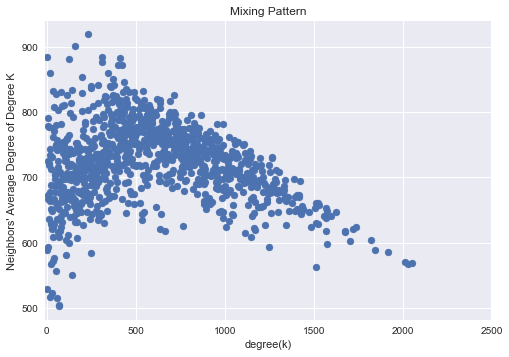

In [180]:
mix=nx.average_degree_connectivity(G_pos)

plt.scatter(list(mix.keys()),list(mix.values()))
plt.title("Mixing Pattern")
plt.ylabel("Neighbors' Average Degree of Degree K")
plt.xlabel("degree(k)")
#plt.ylim([-0.03,0.2])
plt.xlim([-10,2500])
plt.show()

In [174]:
nx.degree_assortativity_coefficient(G_pos)

-0.065788434405594509

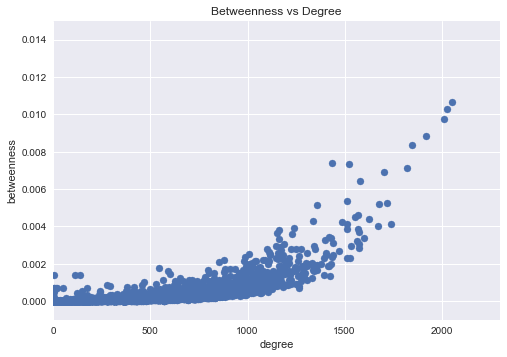

In [162]:
#cent = nx.betweenness_centrality(G_pos)
#de = nx.degree(G_pos)
plt.scatter(list(de.values()),list(cent.values()))
plt.title("Betweenness vs Degree")
plt.ylabel("betweenness")
plt.xlabel("degree")
plt.ylim([-0.001,0.015])
plt.xlim([0,2300])
plt.show()

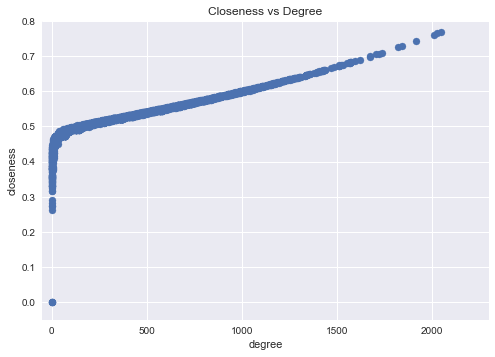

In [163]:
#c = nx.closeness_centrality(G_pos)
plt.scatter(list(de.values()),list(c.values()))
plt.title("Closeness vs Degree")
plt.ylabel("closeness")
plt.xlabel("degree")
plt.ylim([-0.05,0.8])
plt.xlim([-50,2300])
plt.show()

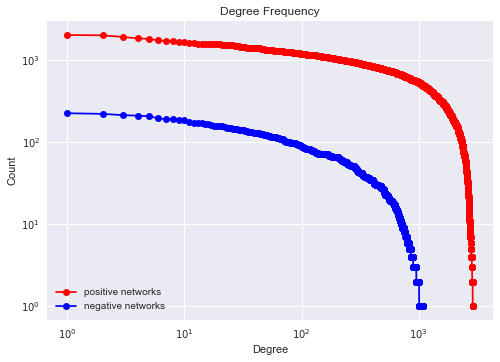

In [142]:
import seaborn as sns
degree_sequence_pos=sorted(nx.degree(G_pos).values(),reverse=True) # degree sequence
degree_sequence_neg=sorted(nx.degree(G_neg).values(),reverse=True)
degree_sequence_neg_w = sorted(nx.degree(G_neg_w).values(),reverse=True)
degree_sequence_pos_w = sorted(nx.degree(G_pos_w).values(),reverse=True)

#print "Degree sequence", degree_sequence
dmax_pos=max(degree_sequence_pos)

plt.loglog(degree_sequence_pos,'r-',marker='o',label='positive networks')
plt.loglog(degree_sequence_neg,'b-',marker='o',label ='negative networks')
#plt.loglog(degree_sequence_neg_w,'b-',marker='o')
#plt.loglog(degree_sequence_pos_w,'b-',marker='o')

plt.title("Degree Frequency")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.legend(loc=3)
plt.show()

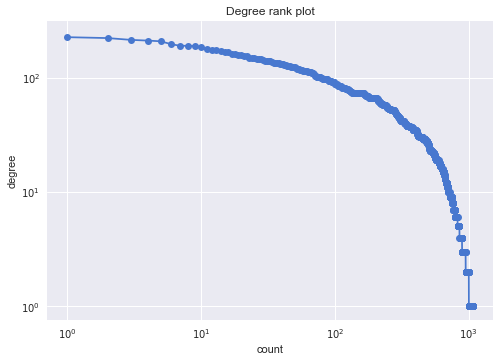

In [261]:
degree_sequence_neg=sorted(nx.degree(G_neg).values(),reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax_neg=max(degree_sequence_neg)

plt.loglog(degree_sequence_neg,'b-',marker='o')
plt.title("Degree rank plot")
plt.ylabel("degree")
plt.xlabel("count")
plt.show()

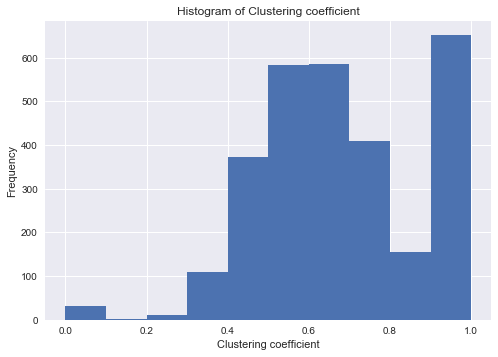

In [186]:
project_networks_45stars.cluster.hist()
plt.title('Histogram of Clustering coefficient')
plt.xlabel('Clustering coefficient')
plt.ylabel('Frequency')

In [190]:
project_networks_45stars.cluster.mean(),project_networks_45stars.cluster.median()

(0.6853195621266083, 0.6560829241680306)

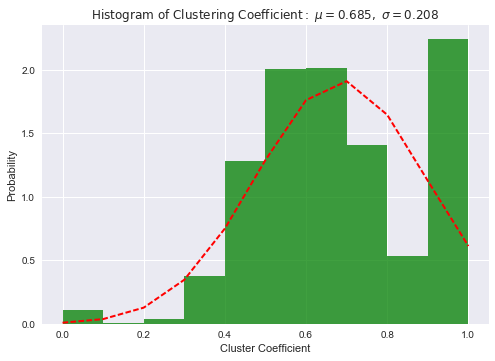

In [234]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt




# best fit of data
(mu, sigma) = norm.fit(a)

# the histogram of the data
n, bins, patches = plt.hist(a, 10,normed=1 ,facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot
plt.xlabel('Cluster Coefficient')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Clustering\ Coefficient :}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)

plt.show()

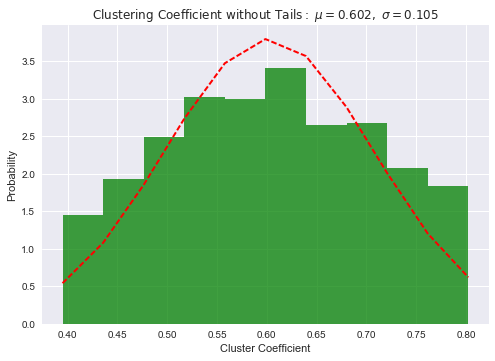

In [235]:
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt




# best fit of data
(mu, sigma) = norm.fit(b)

# the histogram of the data
n, bins, patches = plt.hist(b, 10, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot
plt.xlabel('Cluster Coefficient')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Clustering\ Coefficient\ without\ Tails:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)

plt.show()

In [214]:
a=sorted(list(project_networks_45stars.cluster))

b=a[140:len(a)-800]

In [216]:
c = []

for bi in b :
    c.append((bi - np.mean(b))/np.std(b))

In [217]:
from scipy import stats

stats.kstest(c, 'norm')

KstestResult(statistic=0.041960775224685332, pvalue=0.0018914043277402648)

# Network Graph

In [198]:
import networkx as nx
#from network_analysis import graph_analysis as GA

G=nx.Graph()

for i in range(1,len(network)):
     G.add_edge(network['A'][i],network['B'][i])

In [199]:
bet = nx.betweenness_centrality(G)
degree = nx.degree(G)
clo = nx.closeness_centrality(G)
cluster = nx.clustering(G)
eigen = nx.eigenvector_centrality(G)
k_core = nx.core_number(G)
average_n_d = nx.average_neighbor_degree(G)
degree_cen = nx.degree_centrality(G)

In [110]:
key=[]
for k in bet.keys():
    key.append(k)

dic = {'business_id':key ,
         'bet':key,
         'degree':key,
       'deg_cen':key,
        'clo':key,
         'cluster':key,
       #'eigen':key,
       'k_core':key,
       'avg_n_d':key
       
       
      }
df = pd.DataFrame.from_dict(dic)

In [111]:
for i in range(0,len(df)):
    df['degree'][i] = degree[df.business_id[i]]
    df['bet'][i] = bet[df.business_id[i]]
    df['deg_cen'][i] = degree_cen[df.business_id[i]]
    df['clo'][i] = clo[df.business_id[i]]
    df['cluster'][i] = cluster[df.business_id[i]]
    #df['eigen'][i] = eigen[df.business_id[i]]
    df['k_core'][i] = k_core[df.business_id[i]]
    df['avg_n_d'][i] = average_n_d[df.business_id[i]]
    

In [112]:
df = df.merge(biz[['business_id','open']],on='business_id',how='left')
df= df[['business_id',
         'bet',
         'degree',
       'deg_cen',
        'clo',
         'cluster',
       #'eigen',
       'k_core',
       'avg_n_d',
       'open']]

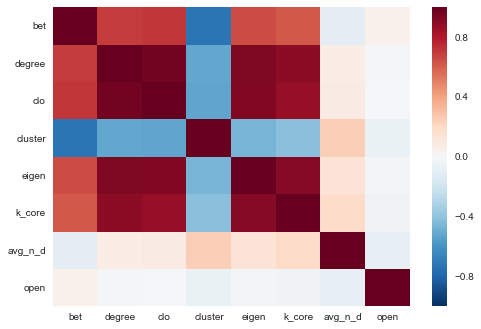

In [108]:
#correlation of networks properties
sns.heatmap(data.corr(method='kendall'))